In [29]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_distribution, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from math import sqrt, pi

In [66]:
siml = AerSimulator()
qcirc = QuantumCircuit(1)
initial_state = [1/sqrt(3), 1j*sqrt(2/3)]
qcirc.initialize(initial_state)
qcirc.u(pi/3, pi/4, pi/2, 0)
mvector = Statevector(qcirc)
print(qcirc)

   ┌─────────────────────────────┐┌────────────────┐
q: ┤ Initialize(0.57735,0.8165j) ├┤ U(π/3,π/4,π/2) ├
   └─────────────────────────────┘└────────────────┘


In [67]:
qcirc.measure_all()
comp_qc = transpile(qcirc, siml)
job = siml.run(comp_qc, shots = 1000)
result = job.result()
counts = result.get_counts()
print("\nTotal count for 0 and 1 are:", counts)


Total count for 0 and 1 are: {'1': 187, '0': 813}


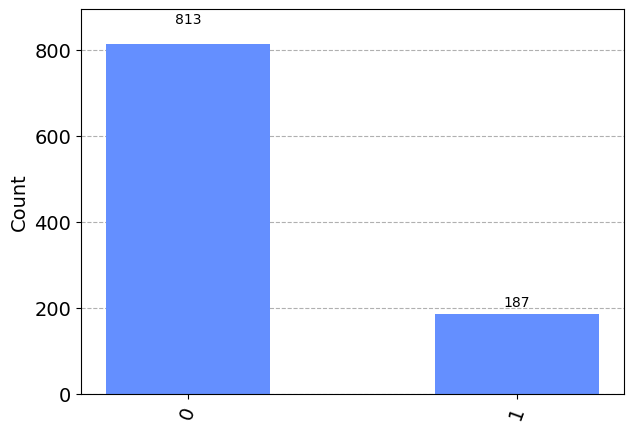

In [68]:
plot_histogram(counts)

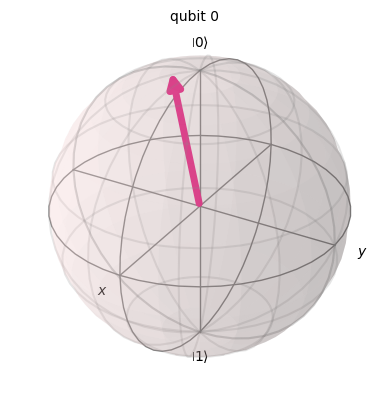

In [69]:
plot_bloch_multivector(mvector)